## <font color=Yellow size=20>Manjeel Chalise
KCE080BCT015
</script>

# Wine Quality Prediction 

##  Objective: Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.

## Source:https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler



In [214]:
df2=pd.read_csv("winequality-red.csv")
df1=pd.read_csv("winequality-white.csv",sep=';')


In [215]:
print(df2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [216]:
print(df1.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [217]:
df = pd.concat([df2, df1], ignore_index=True)

In [218]:
df.columns



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [219]:
df.shape

(6497, 12)

In [220]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [221]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [223]:
# Remove duplicate rows, ignoring the 'Id' column
df = df.drop_duplicates(subset=df.columns.difference(['Id']), keep='first')

print(f"Dataset after removing duplicates: {df.shape[0]} rows")


Dataset after removing duplicates: 5318 rows


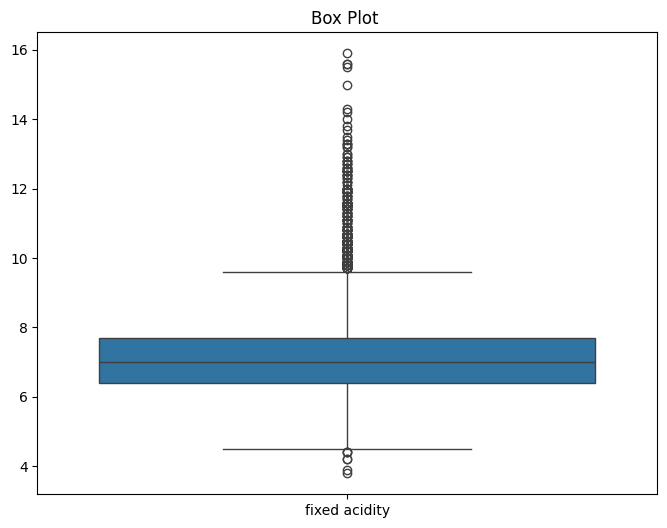

In [224]:
first_f = ['fixed acidity']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[first_f])
plt.title("Box Plot ")
plt.show()

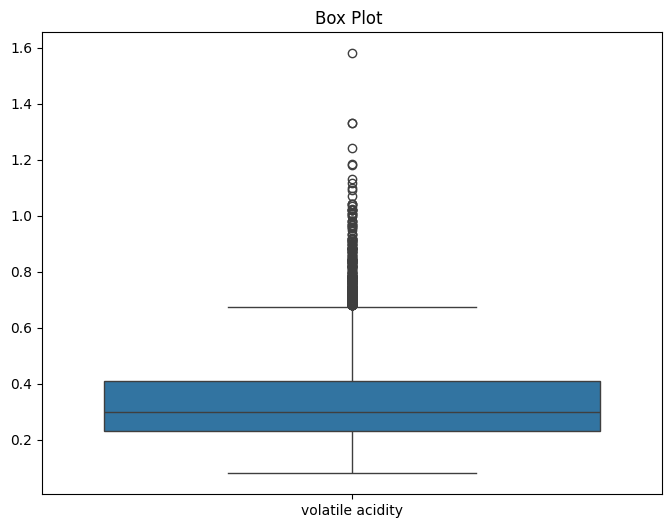

In [225]:
second_four = ['volatile acidity']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four])
plt.title("Box Plot ")
plt.show()

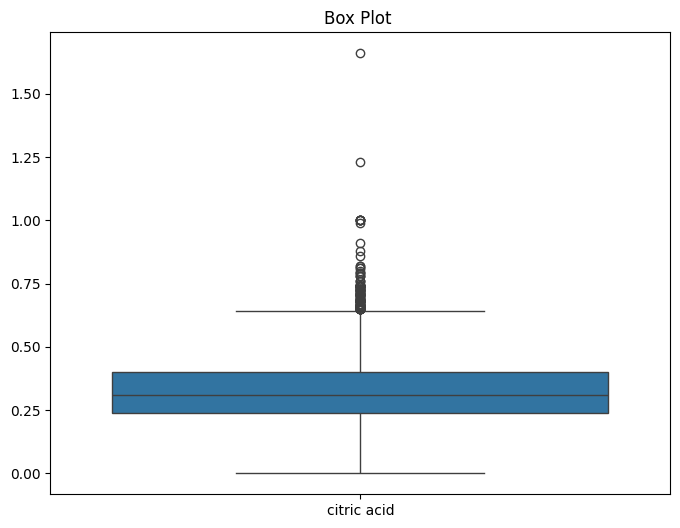

In [226]:
second_four1 = ['citric acid']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

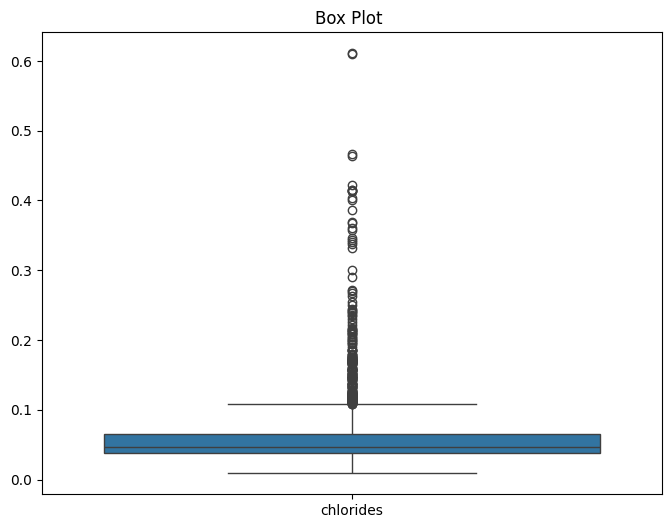

In [227]:
second_four1 = ['chlorides']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

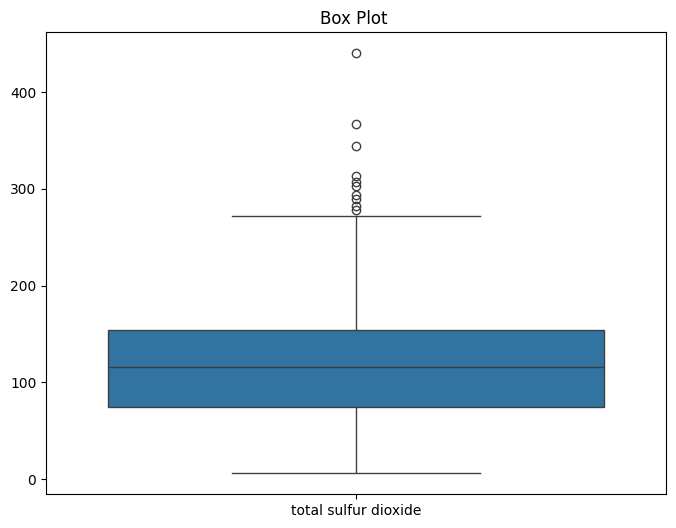

In [228]:
second_four1 = ['total sulfur dioxide']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

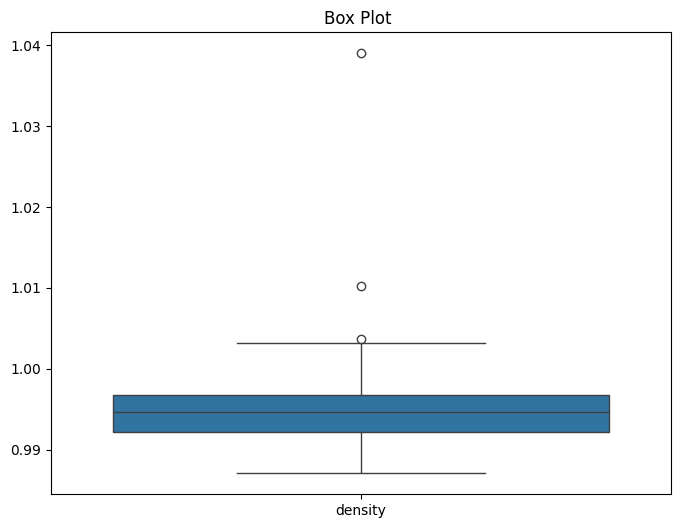

In [229]:
second_four1 = ['density']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

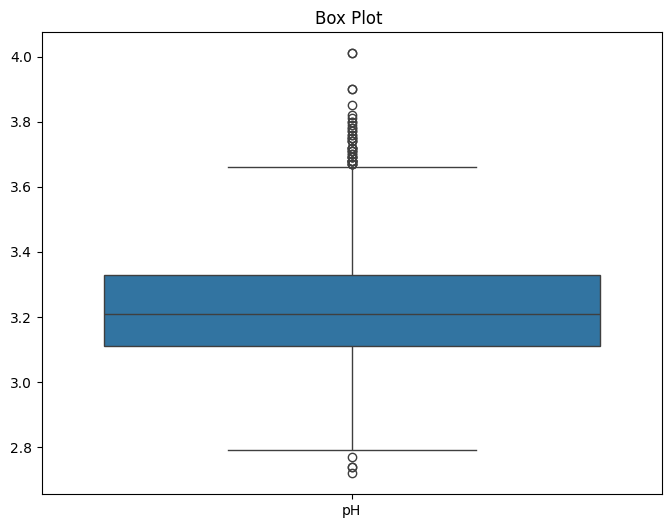

In [230]:
second_four1 = ['pH']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

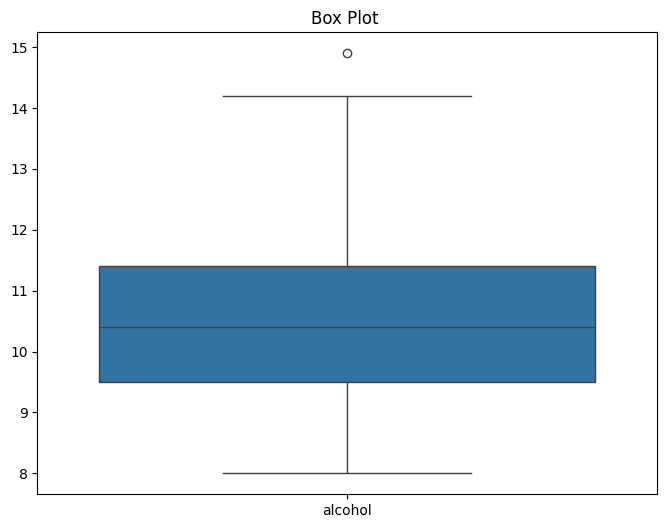

In [231]:
second_four1 = ['alcohol']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

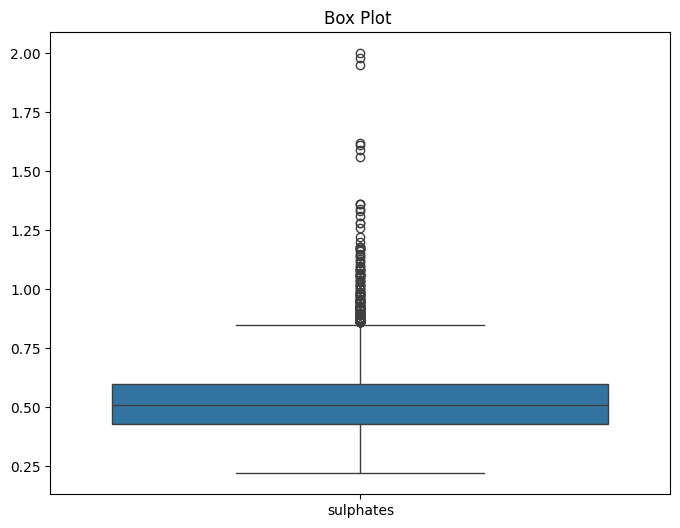

In [232]:
second_four1 = ['sulphates']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

In [233]:

z_scores = df.apply(zscore)
outliers = (abs(z_scores) > 3).sum()

print("Number of outliers in each column:\n", outliers)

Number of outliers in each column:
 fixed acidity           108
volatile acidity         77
citric acid              23
residual sugar           42
chlorides                94
free sulfur dioxide      27
total sulfur dioxide      8
density                   3
pH                       32
sulphates                63
alcohol                   2
quality                  35
dtype: int64


In [234]:
columns_to_normalize = [
    'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol','pH',
]
scaler = StandardScaler()

# Standardize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the standardized data
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   5.318000e+03      5.318000e+03  5318.000000    5.318000e+03   
mean   -4.703103e-16      4.275549e-17     0.318522    4.275549e-17   
std     1.000094e+00      1.000094e+00     0.147177    1.000094e+00   
min    -2.588198e+00     -1.570122e+00     0.000000   -9.887523e-01   
25%    -6.179829e-01     -6.785840e-01     0.240000   -7.220988e-01   
50%    -1.633178e-01     -2.625327e-01     0.310000   -5.221087e-01   
75%     3.671248e-01      3.912621e-01     0.400000    5.445053e-01   
max     6.580882e+00      7.345262e+00     1.660000    1.349942e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  5.318000e+03         5.318000e+03          5.318000e+03  5.318000e+03   
mean   2.137774e-16        -4.275549e-17          1.068887e-16  1.026132e-15   
std    1.000094e+00         1.000094e+00          1.000094e+00  1.000094e+00   
min   -1.294051e+00        -1.630678e+00

## Visualization of the quality of wine on a scale

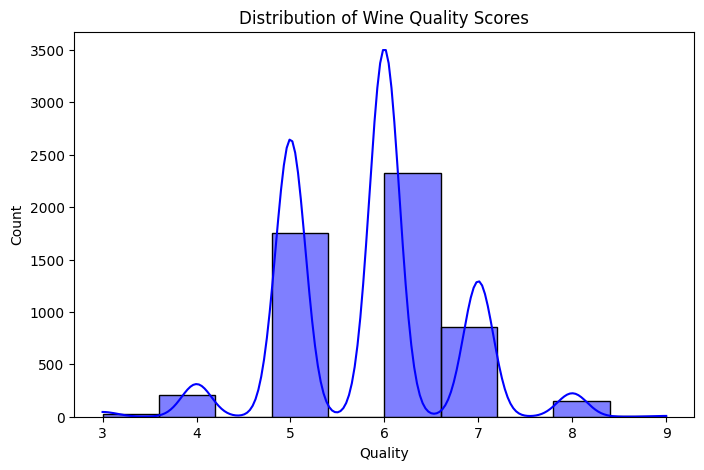

In [235]:
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=10, kde=True, color='blue')
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

## Conversion of the numerical quality scores into three categories: Bad, Average and Excellent


In [236]:
def categorize_quality(q):
    if q <= 4:
        return "Bad"
    elif 5 <= q <= 6:
        return "Average"
    else:
        return "Excellent"
df['quality_category'] = df['quality'].apply(categorize_quality)
print(df['quality_category'])


0         Average
1         Average
2         Average
3         Average
5         Average
          ...    
6492      Average
6493      Average
6494      Average
6495    Excellent
6496      Average
Name: quality_category, Length: 5318, dtype: object


In [237]:
df.shape

(5318, 13)

In [238]:

category_counts = df['quality_category'].value_counts()
print(category_counts)


quality_category
Average      4074
Excellent    1008
Bad           236
Name: count, dtype: int64


In [239]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,0.139792,2.114903,0.00,-0.699878,0.523572,-1.068966,-1.410881,1.100664,1.779190,0.177632,-0.969111,5,Average
1,0.442902,3.184749,0.00,-0.544330,1.120403,-0.282568,-0.829676,0.763426,-0.153621,0.979028,-0.631801,5,Average
2,0.442902,2.471518,0.04,-0.610993,0.957631,-0.844280,-1.058636,0.830873,0.220472,0.778679,-0.631801,5,Average
3,3.019338,-0.381405,0.56,-0.699878,0.496443,-0.731938,-0.952962,1.168111,-0.403016,0.311198,-0.631801,6,Average
5,0.139792,1.877159,0.00,-0.722099,0.496443,-0.956623,-1.305208,1.100664,1.779190,0.177632,-0.969111,5,Average


## Analyzing how the different features affect the quality scores

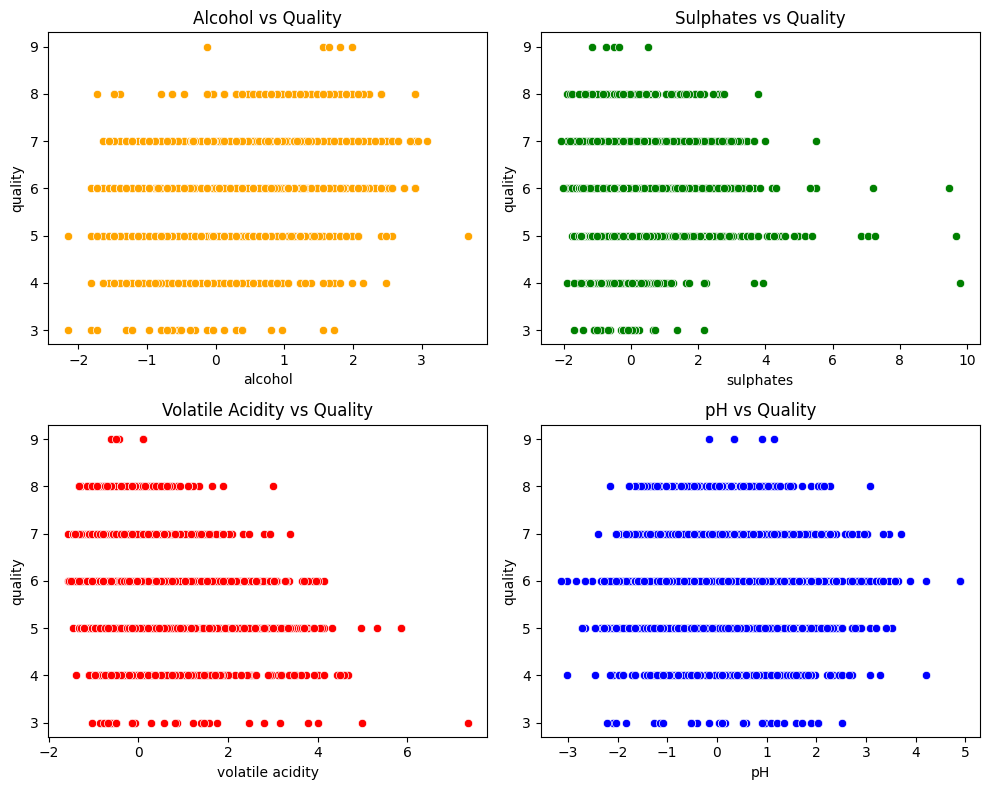

In [240]:
# Plot key features vs. quality
plt.figure(figsize=(10, 8))

# Alcohol vs Quality
plt.subplot(2, 2, 1)
sns.scatterplot(x='alcohol', y='quality', data=df, color='orange')
plt.title('Alcohol vs Quality')

# Sulphates vs Quality
plt.subplot(2, 2, 2)
sns.scatterplot(x='sulphates', y='quality', data=df, color='green')
plt.title('Sulphates vs Quality')

# Volatile Acidity vs Quality
plt.subplot(2, 2, 3)
sns.scatterplot(x='volatile acidity', y='quality', data=df, color='red')
plt.title('Volatile Acidity vs Quality')

# pH vs Quality
plt.subplot(2, 2, 4)
sns.scatterplot(x='pH', y='quality', data=df, color='blue')
plt.title('pH vs Quality')

plt.tight_layout()
plt.show()

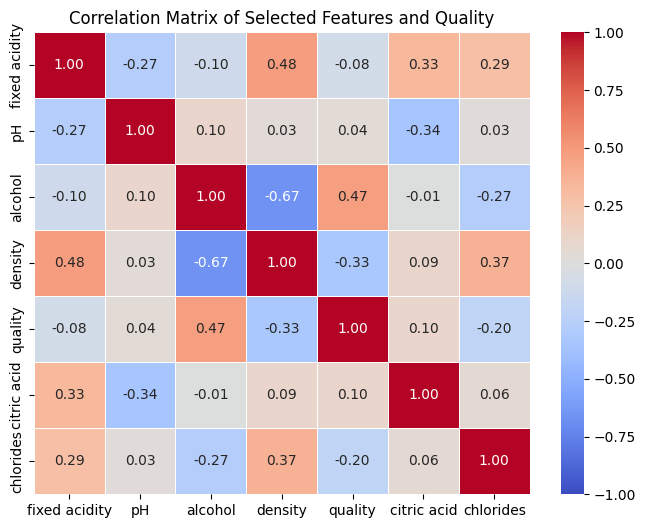

In [241]:

relevant_columns = ['fixed acidity', 'pH', 'alcohol', 'density', 'quality','citric acid','chlorides']



relevant_data = df[relevant_columns].copy()

corr_matrix = relevant_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features and Quality')
plt.show()


### From the above we can draw conclusions as: 
<font size=2> The more alcohol the better the quality of wine. <br>
As the density decreases the quality of wine increases.<br>
density,fixed acidity and citric acid are closely related to each other<br>
For greater ph, there is less acidity.<br>
</font>

## Visualization of pairwise relationship between the different features:fixed acidity,ph,alcohol,density

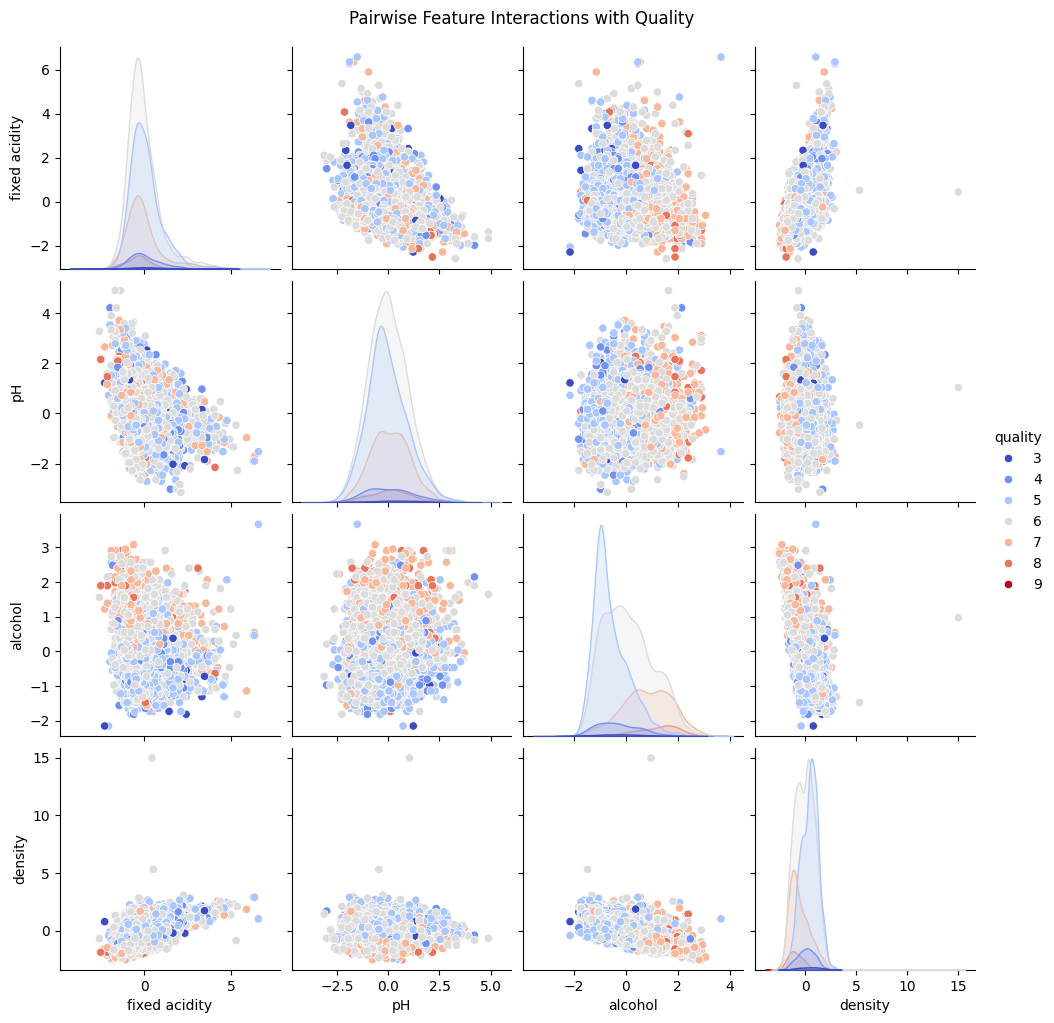

In [243]:

sns.pairplot(df[['fixed acidity', 'pH', 'alcohol', 'density', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Feature Interactions with Quality', y=1.02)
plt.show()


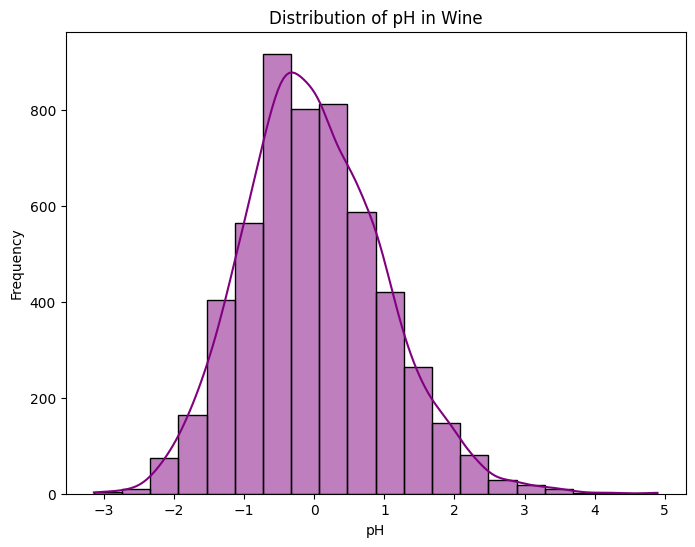

In [244]:
# Histogram to visualize pH distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], kde=True, color='purple', bins=20)
plt.title('Distribution of pH in Wine')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()


In [245]:
print(df['pH'])

0       1.779190
1      -0.153621
2       0.220472
3      -0.403016
5       1.779190
          ...   
6492    0.282820
6493   -0.465364
6494   -1.462944
6495    0.719261
6496    0.220472
Name: pH, Length: 5318, dtype: float64


## Acidity composition in the wine(Visualization)

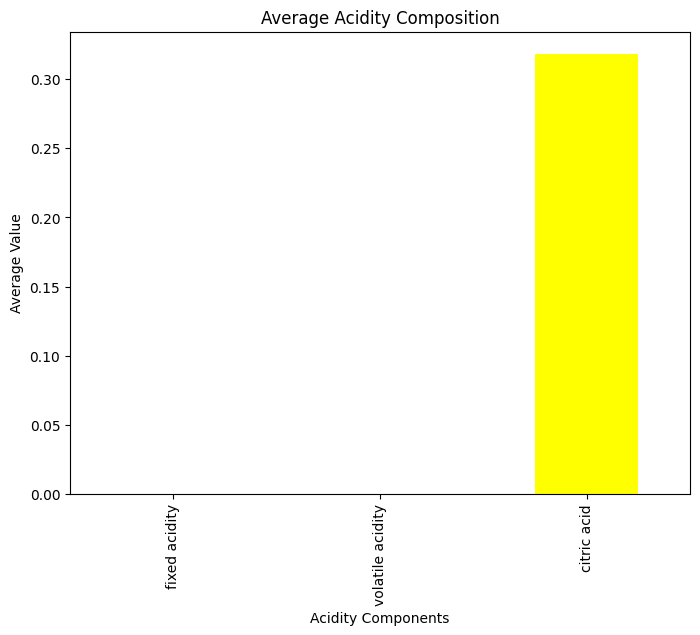

In [246]:
# Bar plot for acidity components
df[['fixed acidity', 'volatile acidity', 'citric acid']].mean().plot(kind='bar', color=['red', 'orange', 'yellow'], figsize=(8, 6))
plt.title('Average Acidity Composition')
plt.xlabel('Acidity Components')
plt.ylabel('Average Value')
plt.show()


## Free sulphur vs total sulfur comparison

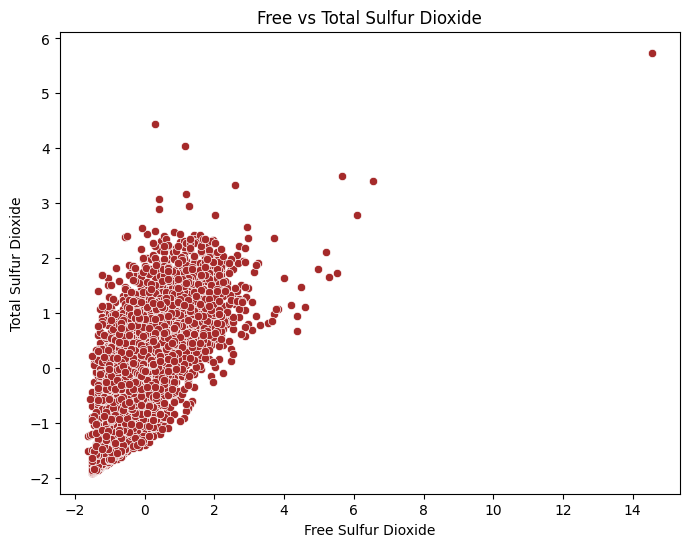

In [247]:
# Scatter plot of free vs total sulfur dioxide
plt.figure(figsize=(8, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df, color='brown')
plt.title('Free vs Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()


## Density vs Sugar analysis

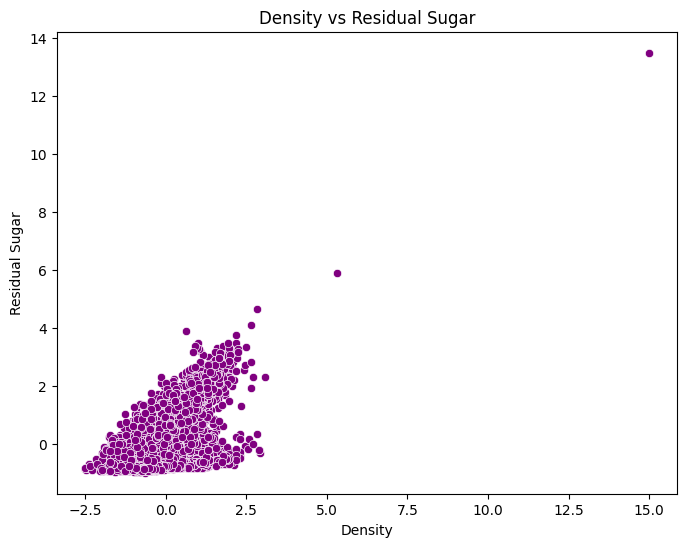

In [248]:
# Scatter plot of density vs residual sugar
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='residual sugar', data=df, color='purple')
plt.title('Density vs Residual Sugar')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()


## Alcohol vs Density visualization

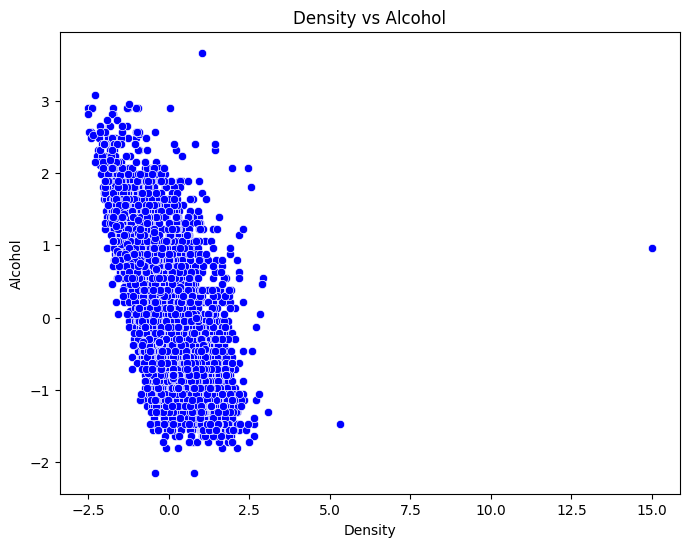

In [249]:
# Scatter plot of density vs alcohol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='alcohol', data=df, color='blue')
plt.title('Density vs Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()


### The above graph shows that the higher the alcohol level, the lower is the density level

## Feature Engineering

### Introduction of new features like Acidity Ratio, Sulphur Balance and Sugar-Alcohol Ratio.

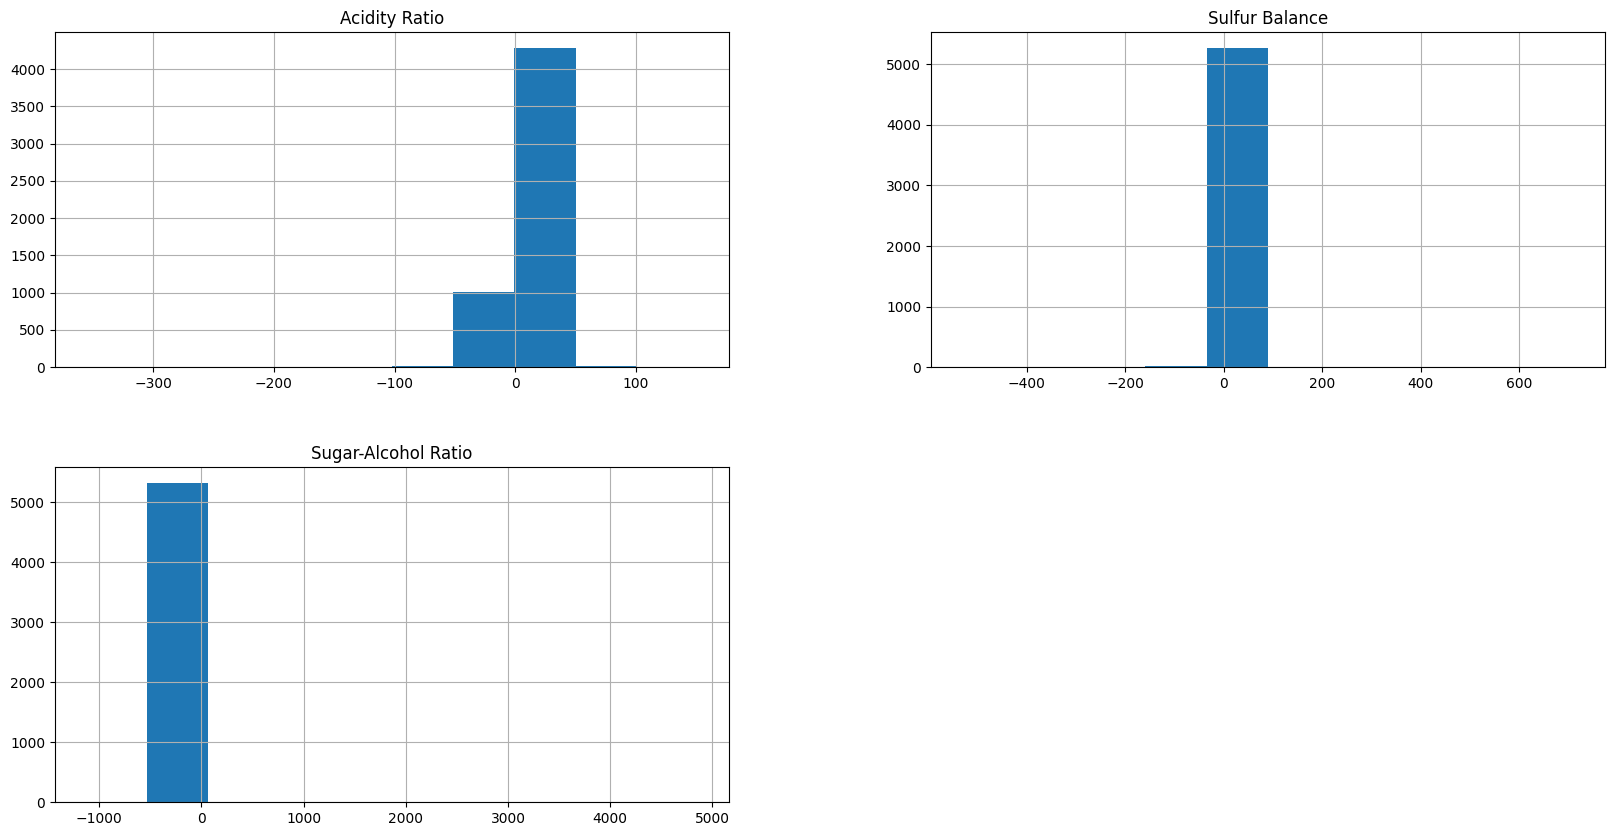

In [250]:
# Feature Engineering
df['Acidity Ratio'] = df['fixed acidity'] / df['volatile acidity']
df['Sulfur Balance'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['Sugar-Alcohol Ratio'] = df['residual sugar'] / df['alcohol']

# Plot the new features
df[['Acidity Ratio', 'Sulfur Balance', 'Sugar-Alcohol Ratio']].hist(figsize=(20, 10), bins=10)
plt.show()


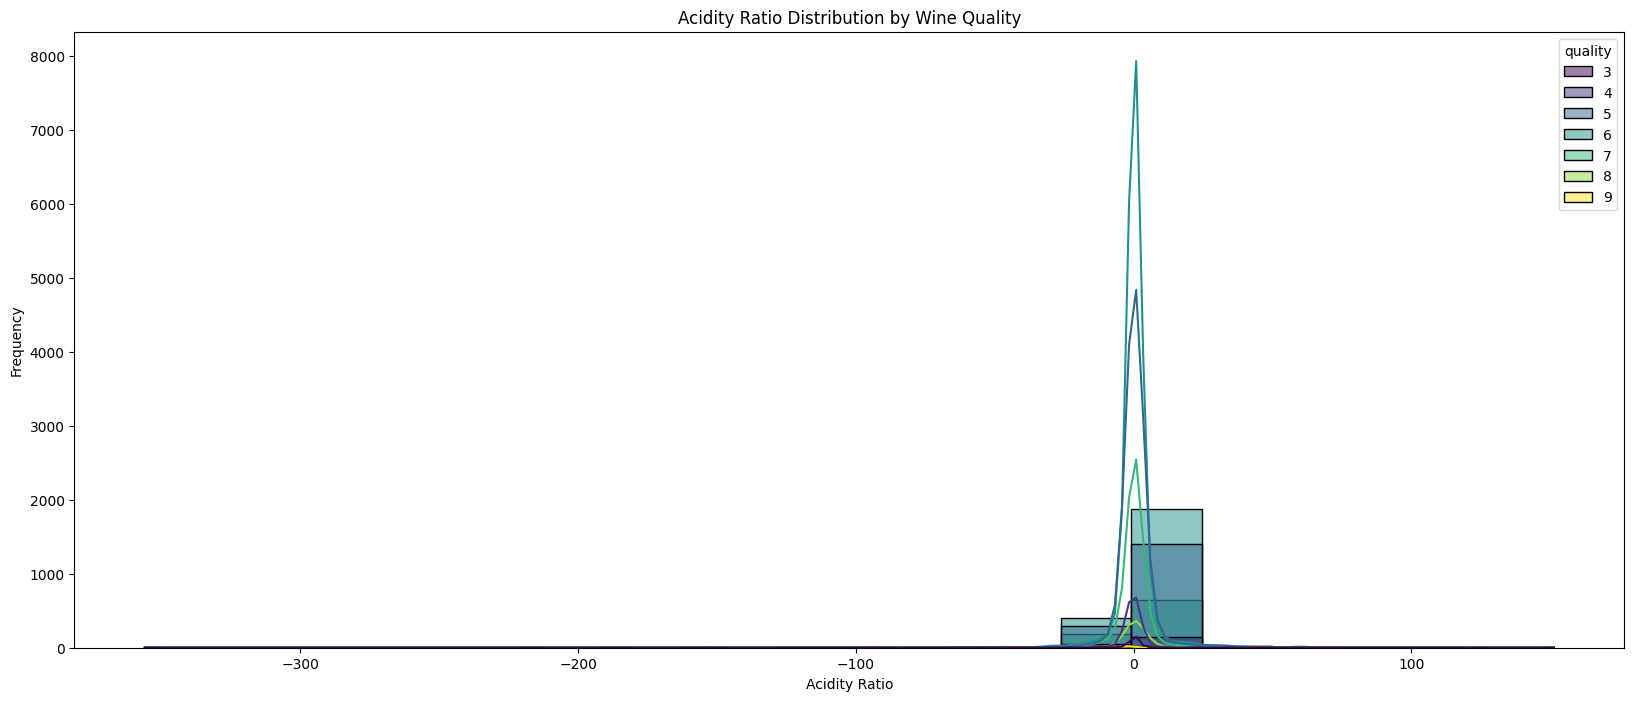

In [255]:
# Plotting the distribution of Acidity Ratio based on Quality
plt.figure(figsize=(20, 8))
sns.histplot(data=df, x='Acidity Ratio', hue='quality', kde=True, bins=20, palette='viridis')
plt.title('Acidity Ratio Distribution by Wine Quality')
plt.xlabel('Acidity Ratio')
plt.ylabel('Frequency')
plt.show()


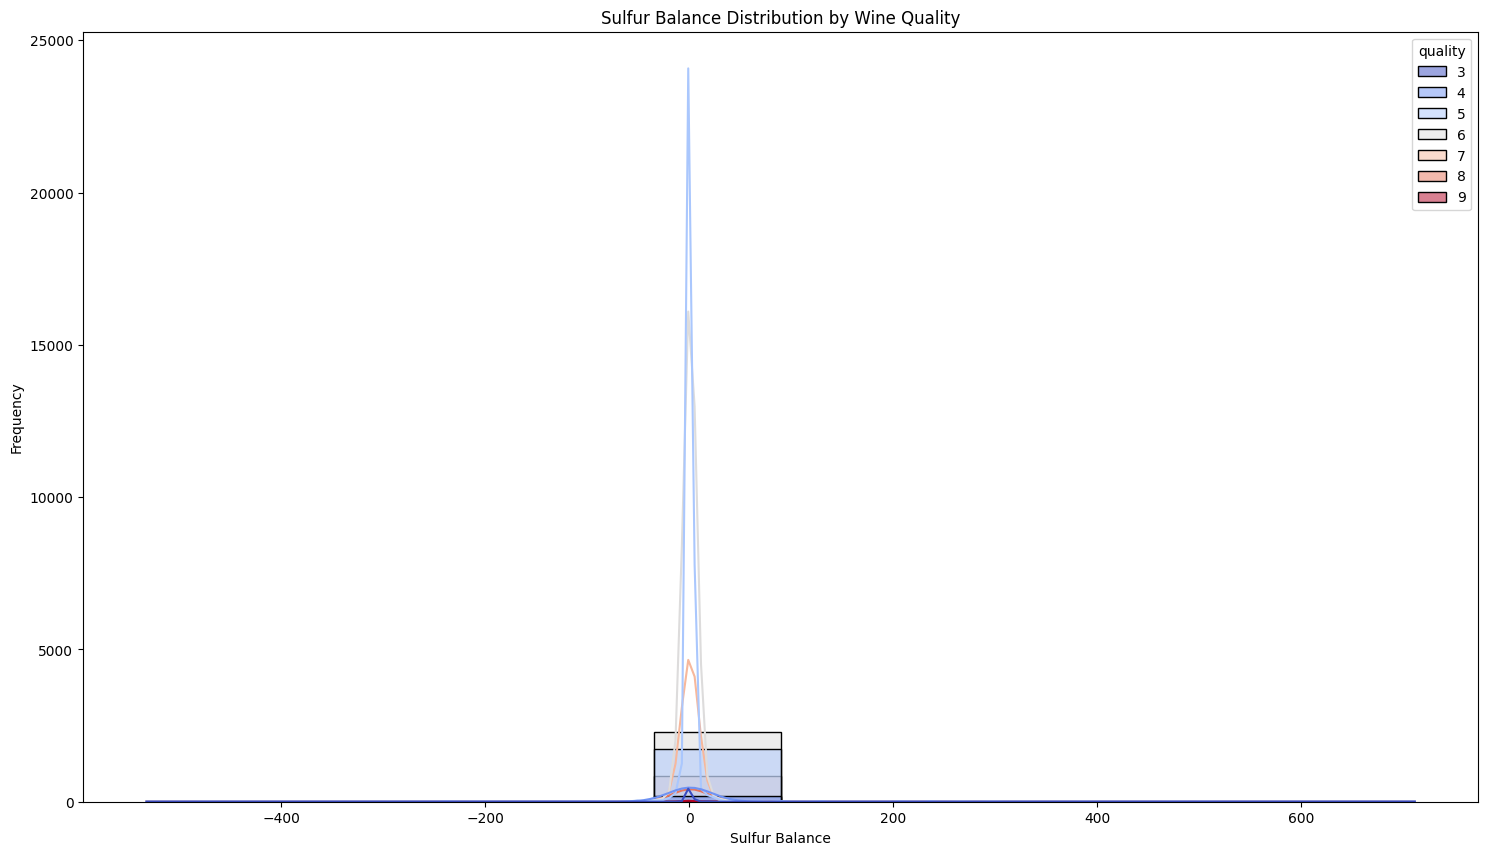

In [256]:
# Plotting the distribution of Sulfur Balance based on Quality
plt.figure(figsize=(18, 10))
sns.histplot(data=df, x='Sulfur Balance', hue='quality', kde=True, bins=10, palette='coolwarm')
plt.title('Sulfur Balance Distribution by Wine Quality')
plt.xlabel('Sulfur Balance')
plt.ylabel('Frequency')
plt.show()


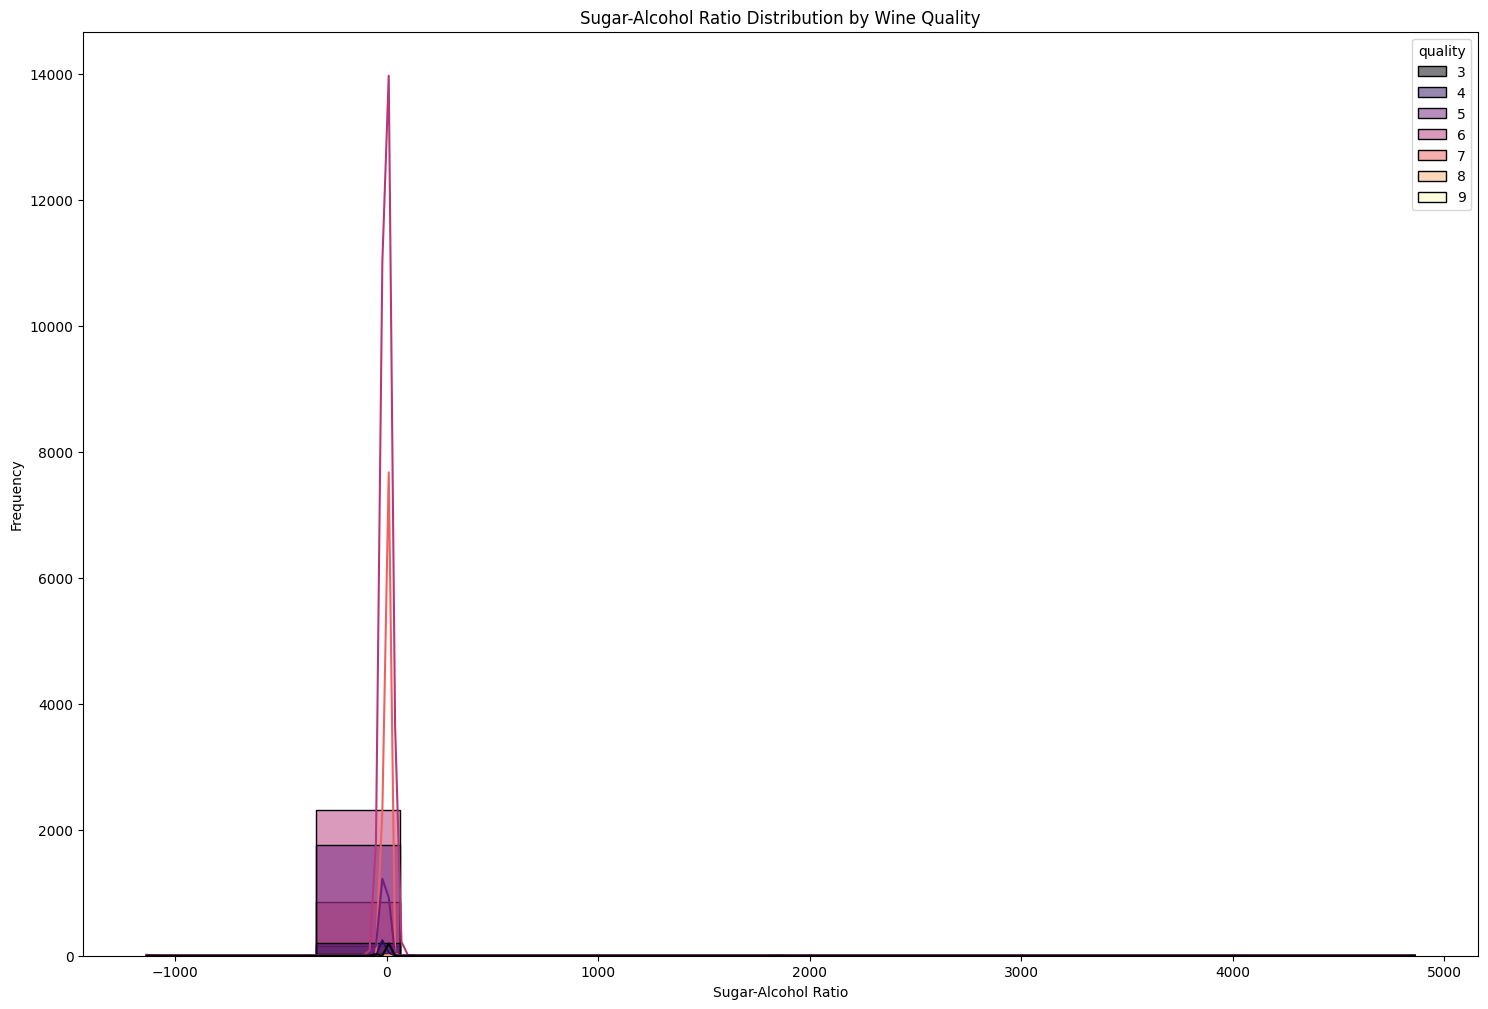

In [257]:
# Plotting the distribution of Sugar-Alcohol Ratio based on Quality
plt.figure(figsize=(18, 12))
sns.histplot(data=df, x='Sugar-Alcohol Ratio', hue='quality', kde=True, bins=15, palette='magma')
plt.title('Sugar-Alcohol Ratio Distribution by Wine Quality')
plt.xlabel('Sugar-Alcohol Ratio')
plt.ylabel('Frequency')
plt.show()


## Separation of columns to train the model

In [268]:
X = df[[ 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',  
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Acidity Ratio' 
     ]]
y = df['quality_category'] 

## Dividing the dataset into two for testing and training the model 

In [269]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


In [270]:
log_reg = LogisticRegression(max_iter=1000) 


### Training the model

In [271]:
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [272]:
y_pred = log_reg.predict(X_test)
print(y_pred)


['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']


### Prediction of the wine quality for the 20% test data is given above.

In [273]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.55%


In [274]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[800   1  35]
 [ 43   2   2]
 [126   0  55]]


In [275]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Average       0.83      0.96      0.89       836
         Bad       0.67      0.04      0.08        47
   Excellent       0.60      0.30      0.40       181

    accuracy                           0.81      1064
   macro avg       0.70      0.43      0.46      1064
weighted avg       0.78      0.81      0.77      1064

